In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv(r"C:\Users\Sahil Kumar\Desktop\Data Science\Semester-2\Machine Learning\Machine Learning Data\Kaggle\fitness_class_2212.csv")

# Overview

In [3]:
d.shape

(1500, 8)

In [4]:
d.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [6]:
d.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


# Preprocessing of Data

## Exploratory Data Analysis (EDA) & Feature Engineering

In [7]:
d1=d.copy()

In [8]:
d["category"].value_counts(dropna=False)

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64

In [9]:
d1["category"]=d1["category"].replace("-",np.nan)

In [10]:
d1["category"].value_counts(dropna=False)

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
NaN          13
Name: category, dtype: int64

In [11]:
d["time"].value_counts(dropna=False)

AM    1141
PM     359
Name: time, dtype: int64

In [12]:
d["day_of_week"].value_counts(dropna=False)

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

In [13]:
d1["day_of_week"]=d1["day_of_week"].replace({"Wednesday":"Wed","Fri.":"Fri","Monday":"Mon"})

In [14]:
d1["day_of_week"].value_counts(dropna=False)

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

In [15]:
d["months_as_member"].value_counts(dropna=False)

8      99
7      93
6      92
9      85
5      80
       ..
60      1
90      1
105     1
62      1
69      1
Name: months_as_member, Length: 72, dtype: int64

In [16]:
d["weight"].value_counts(dropna=False)

NaN      20
78.28     5
75.63     4
84.64     4
71.49     3
         ..
65.01     1
73.09     1
86.22     1
79.44     1
94.39     1
Name: weight, Length: 1242, dtype: int64

In [17]:
d["booking_id"].value_counts(dropna=False)

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64

In [18]:
d1.drop(columns=["booking_id","weight"],inplace=True)

In [19]:
d["days_before"].value_counts(dropna=False)

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64

In [20]:
d1["days_before"]=d["days_before"].str.split()

In [21]:
d1["days_before"]=d1["days_before"].str[0]

In [22]:
d1["days_before"]=d1["days_before"].astype(int)

In [23]:
d1["days_before"].value_counts(dropna=False)

10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

In [24]:
d1.dropna(inplace=True)

In [25]:
d1.isnull().sum()

months_as_member    0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [26]:
d1[["months_as_member","days_before"]].corr()

,months_as_member,days_before
months_as_member,1.000000,0.000128
days_before,0.000128,1.000000


In [27]:
obj_data=d1[d1.dtypes[d1.dtypes=="object"].index]
num_data=d1[d1.dtypes[d1.dtypes!="object"].index]

In [28]:
def outcap(x):
    x=x.clip(upper=x.quantile(.99))
    return x

In [29]:
num_data=num_data.apply(outcap)

In [30]:
all_data=pd.concat([obj_data,num_data],axis=1)

In [31]:
d2=pd.get_dummies(all_data,columns=["day_of_week","time","category"],drop_first=True)

In [32]:
d2

,months_as_member,days_before,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,17.0,8.0,0,0,0,0,0,0,1,1,0,0,1,0
1,10.0,2.0,0,1,0,0,0,0,0,0,0,1,0,0
2,16.0,14.0,0,0,0,1,0,0,0,0,0,0,1,0
3,5.0,10.0,0,0,0,0,0,0,0,0,1,0,0,0
4,15.0,8.0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,21.0,10.0,0,0,0,0,0,0,0,0,0,1,0,0
1496,29.0,2.0,0,1,0,0,0,0,0,0,0,0,1,0
1497,9.0,4.0,0,0,0,0,0,1,0,0,0,1,0,0
1498,34.0,14.0,0,0,0,1,0,0,0,0,0,0,0,0


## Model Development

In [33]:
d2.columns

Index(['months_as_member', 'days_before', 'attended', 'day_of_week_Mon',
       'day_of_week_Sat', 'day_of_week_Sun', 'day_of_week_Thu',
       'day_of_week_Tue', 'day_of_week_Wed', 'time_PM', 'category_Cycling',
       'category_HIIT', 'category_Strength', 'category_Yoga'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [35]:
y=d2["attended"]
x=d2.drop(columns=["attended"])

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [37]:
dtc=DecisionTreeClassifier(max_depth=10,min_samples_split=250,min_samples_leaf=40)

In [38]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=40, min_samples_split=250)

## Model Evaluation

In [39]:
print("Train Accuracy: ",round(dtc.score(x_train,y_train),3))
print("Test Accuracy: ",round(dtc.score(x_test,y_test),3))

Train Accuracy:  0.787
Test Accuracy:  0.774


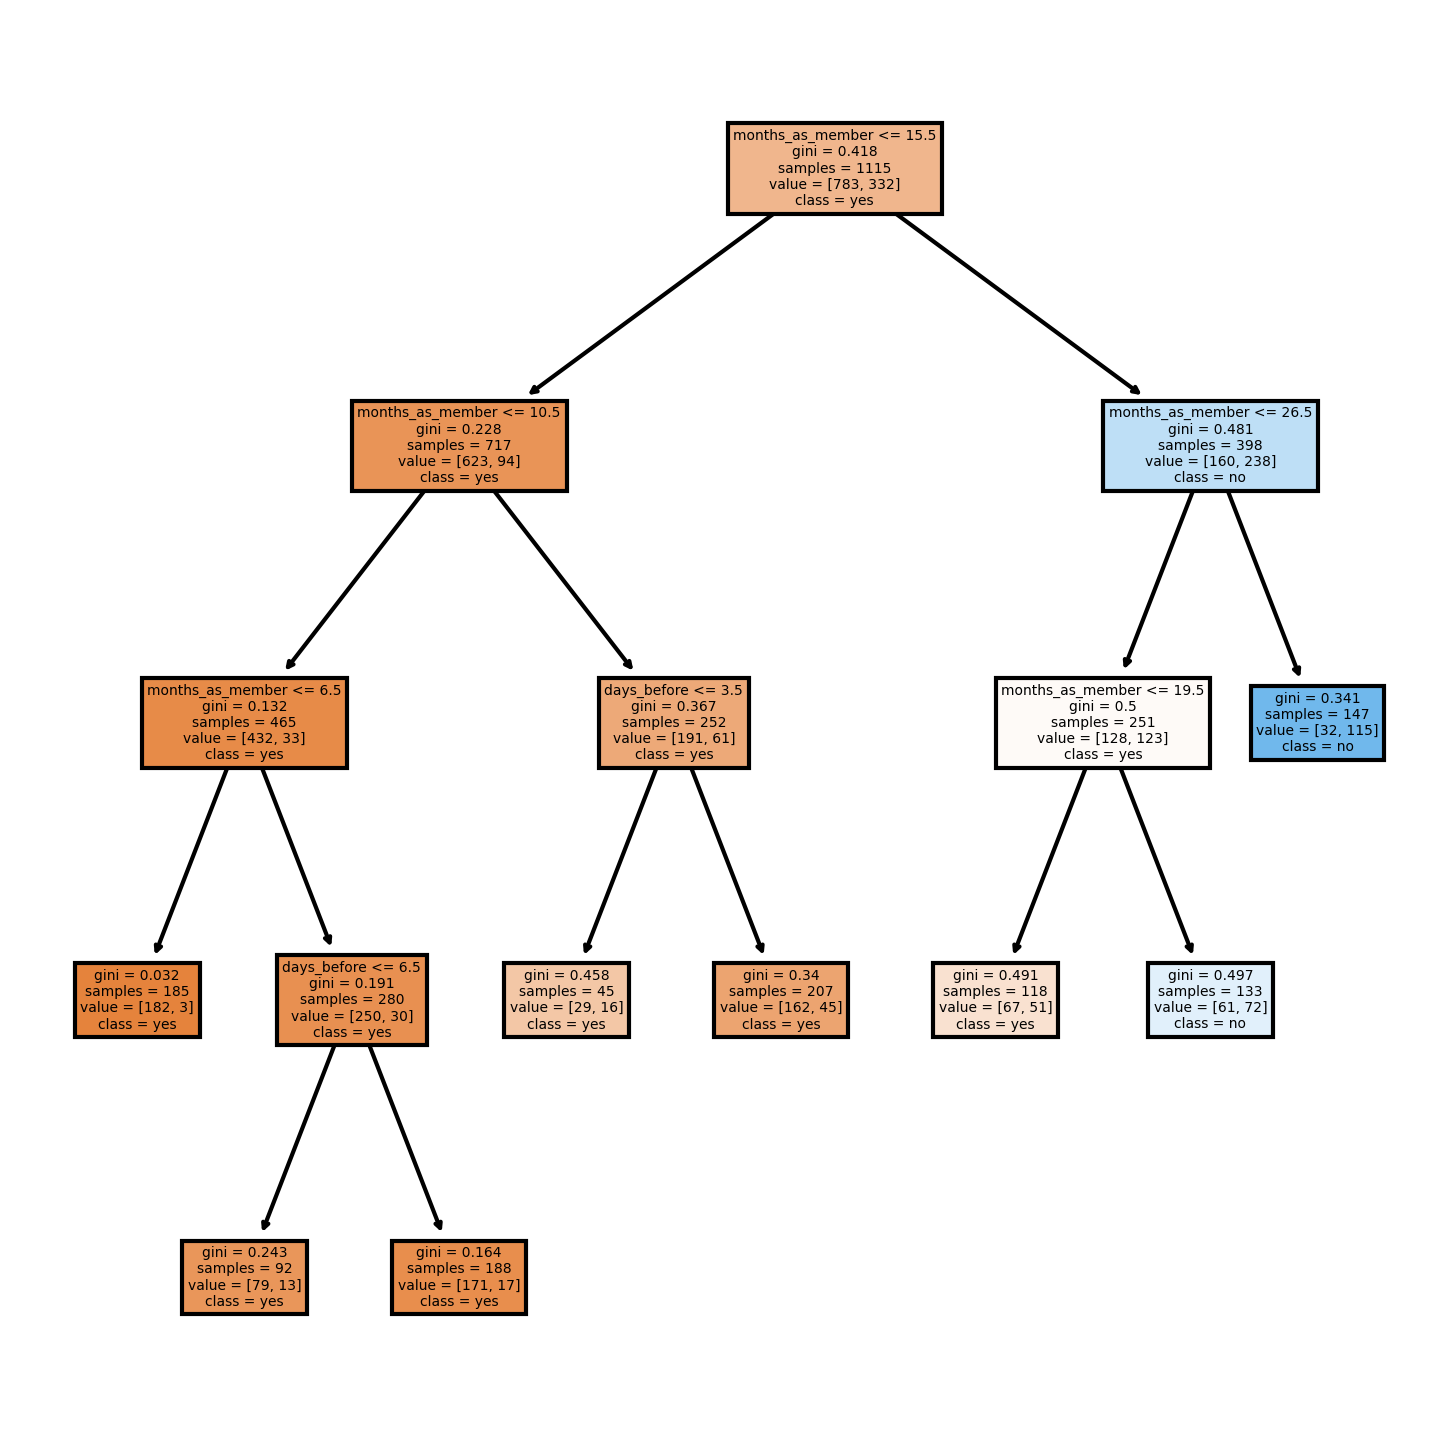

In [40]:
from sklearn.tree import plot_tree
tn=x_train.columns
an=["yes","no"]

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=300)

dtc_plot=plot_tree(dtc,feature_names=tn,class_names=an,filled=True)

In [41]:
pd.DataFrame({"Features":x_train.columns,"Importance":dtc.feature_importances_}).sort_values(by=["Importance"],
                                                                                             ascending=False)

,Features,Importance
0,months_as_member,0.987814
1,days_before,0.012186
2,day_of_week_Mon,0.000000
3,day_of_week_Sat,0.000000
4,day_of_week_Sun,0.000000
5,day_of_week_Thu,0.000000
6,day_of_week_Tue,0.000000
7,day_of_week_Wed,0.000000
8,time_PM,0.000000
9,category_Cycling,0.000000
